# Confesor_EDA (2023)
# Part of OEAS 895 Capstone Project
## This Jupyter Notebook takes indexed,cleaned, and combined WFS data from FWRI & CMEMs (Kb_final.csv) and does exploratory data analysis (EDA) on the dataset prior to model construction.

### Import Packages - Using Python Version 3.11.2 (make sure ConfesorCapstoneEv is set as current kernel!)

In [1]:
#Python script with all of the necessary functions
import Confesor_Functions as CF

#For data editing
import pandas as pd
import numpy as np
import csv
import string
import os

#For TS Diagram
import gsw

#For Spearman's Correlation Tests
from scipy.stats import spearmanr

#Graphing & Plotting
import cartopy as cp
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io import shapereader
from matplotlib import rcParams, rc
from matplotlib import gridspec
import matplotlib.pyplot as plt
import matplotlib as mpl

#Color options for plots
import seaborn as sb
import cmocean as cmo

#Keep figures inline
%matplotlib inline

#If the current working directory is not where you have saved all the necessary files, change the directory.
os.chdir('C:\\Users\\krist\\OneDrive\\Desktop\\Files\\ODU\\Spring2023\\OEAS895\\MLP_Classifier_KbrevisHABs')
os.getcwd()

'C:\\Users\\krist\\OneDrive\\Desktop\\Files\\ODU\\Spring2023\\OEAS895\\MLP_Classifier_KbrevisHABs'

In [2]:
#Download CMEMS & FWRI combined .csv file
Kb_final=CF.DownloadCSV('Kb_final.csv','Kb_final')
Kb_final[['Date']] = Kb_final[['Date']].apply(pd.to_datetime)
Kb_final=Kb_final.drop(columns= ['Unnamed: 0'])
Kb_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10064 entries, 0 to 10063
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10064 non-null  datetime64[ns]
 1   Depth_m    10064 non-null  float64       
 2   Latitude   10064 non-null  float64       
 3   Longitude  10064 non-null  float64       
 4   Kbrevis    10064 non-null  int64         
 5   Temp_C     10064 non-null  float64       
 6   Salinity   10064 non-null  float64       
 7   BloomID    10064 non-null  int64         
 8   NO3        10064 non-null  float64       
 9   PO4        10064 non-null  float64       
 10  Si         10064 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 865.0 KB


### Assign variables to data & get std.dev, mean, median, max, and min.

In [3]:
#Define variables
Lon=CF.VariableCSV(Kb_final,'Longitude','Lon')
Lat=CF.VariableCSV(Kb_final,'Latitude','Lat')
Depth=CF.VariableCSV(Kb_final,'Depth_m','Depth')
Kbrevis=CF.VariableCSV(Kb_final,'Kbrevis','Kbrevis')
Temp=CF.VariableCSV(Kb_final,'Temp_C','Temp')
Sal=CF.VariableCSV(Kb_final,'Salinity','Sal')
BloomID=CF.VariableCSV(Kb_final,'BloomID','BloomID')
NO3=CF.VariableCSV(Kb_final,'NO3','NO3')
PO4=CF.VariableCSV(Kb_final,'PO4','PO4')
Si=CF.VariableCSV(Kb_final,'Si','Si')

#Marked data below is not needed for this particular model, but still is important to have on hand
#O2=CF.VariableCSV(Kb_final,'O2','O2')
#Chl=CF.VariableCSV(Kb_final,'chl','Chl')

#EDA- PO4 has smallest variance, while Kbrevis has biggest variance
Kb_final[['Kbrevis','Depth_m','Temp_C','Salinity','NO3','PO4','Si']].agg(['std','mean','median','max','min'])

Kbrevis   Depth_m     Temp_C   Salinity        NO3       PO4  \
std     1.606814e+06  0.141290   5.028454   6.053556   1.644527  0.003074   
mean    1.299599e+05  0.405495  24.817921  31.900248   1.248983  0.002111   
median  0.000000e+00  0.500000  25.600000  34.363842   0.762936  0.001221   
max     7.729556e+07  0.500000  39.100000  47.290000  11.818180  0.074222   
min     0.000000e+00  0.100000   5.700000   0.150000   0.004355  0.000027   

               Si  
std      4.926889  
mean    10.179175  
median   9.892280  
max     24.072092  
min      2.476244

### Plot data parameters onto samples

C:\Users\krist\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\krist\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
C:\Users\krist\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


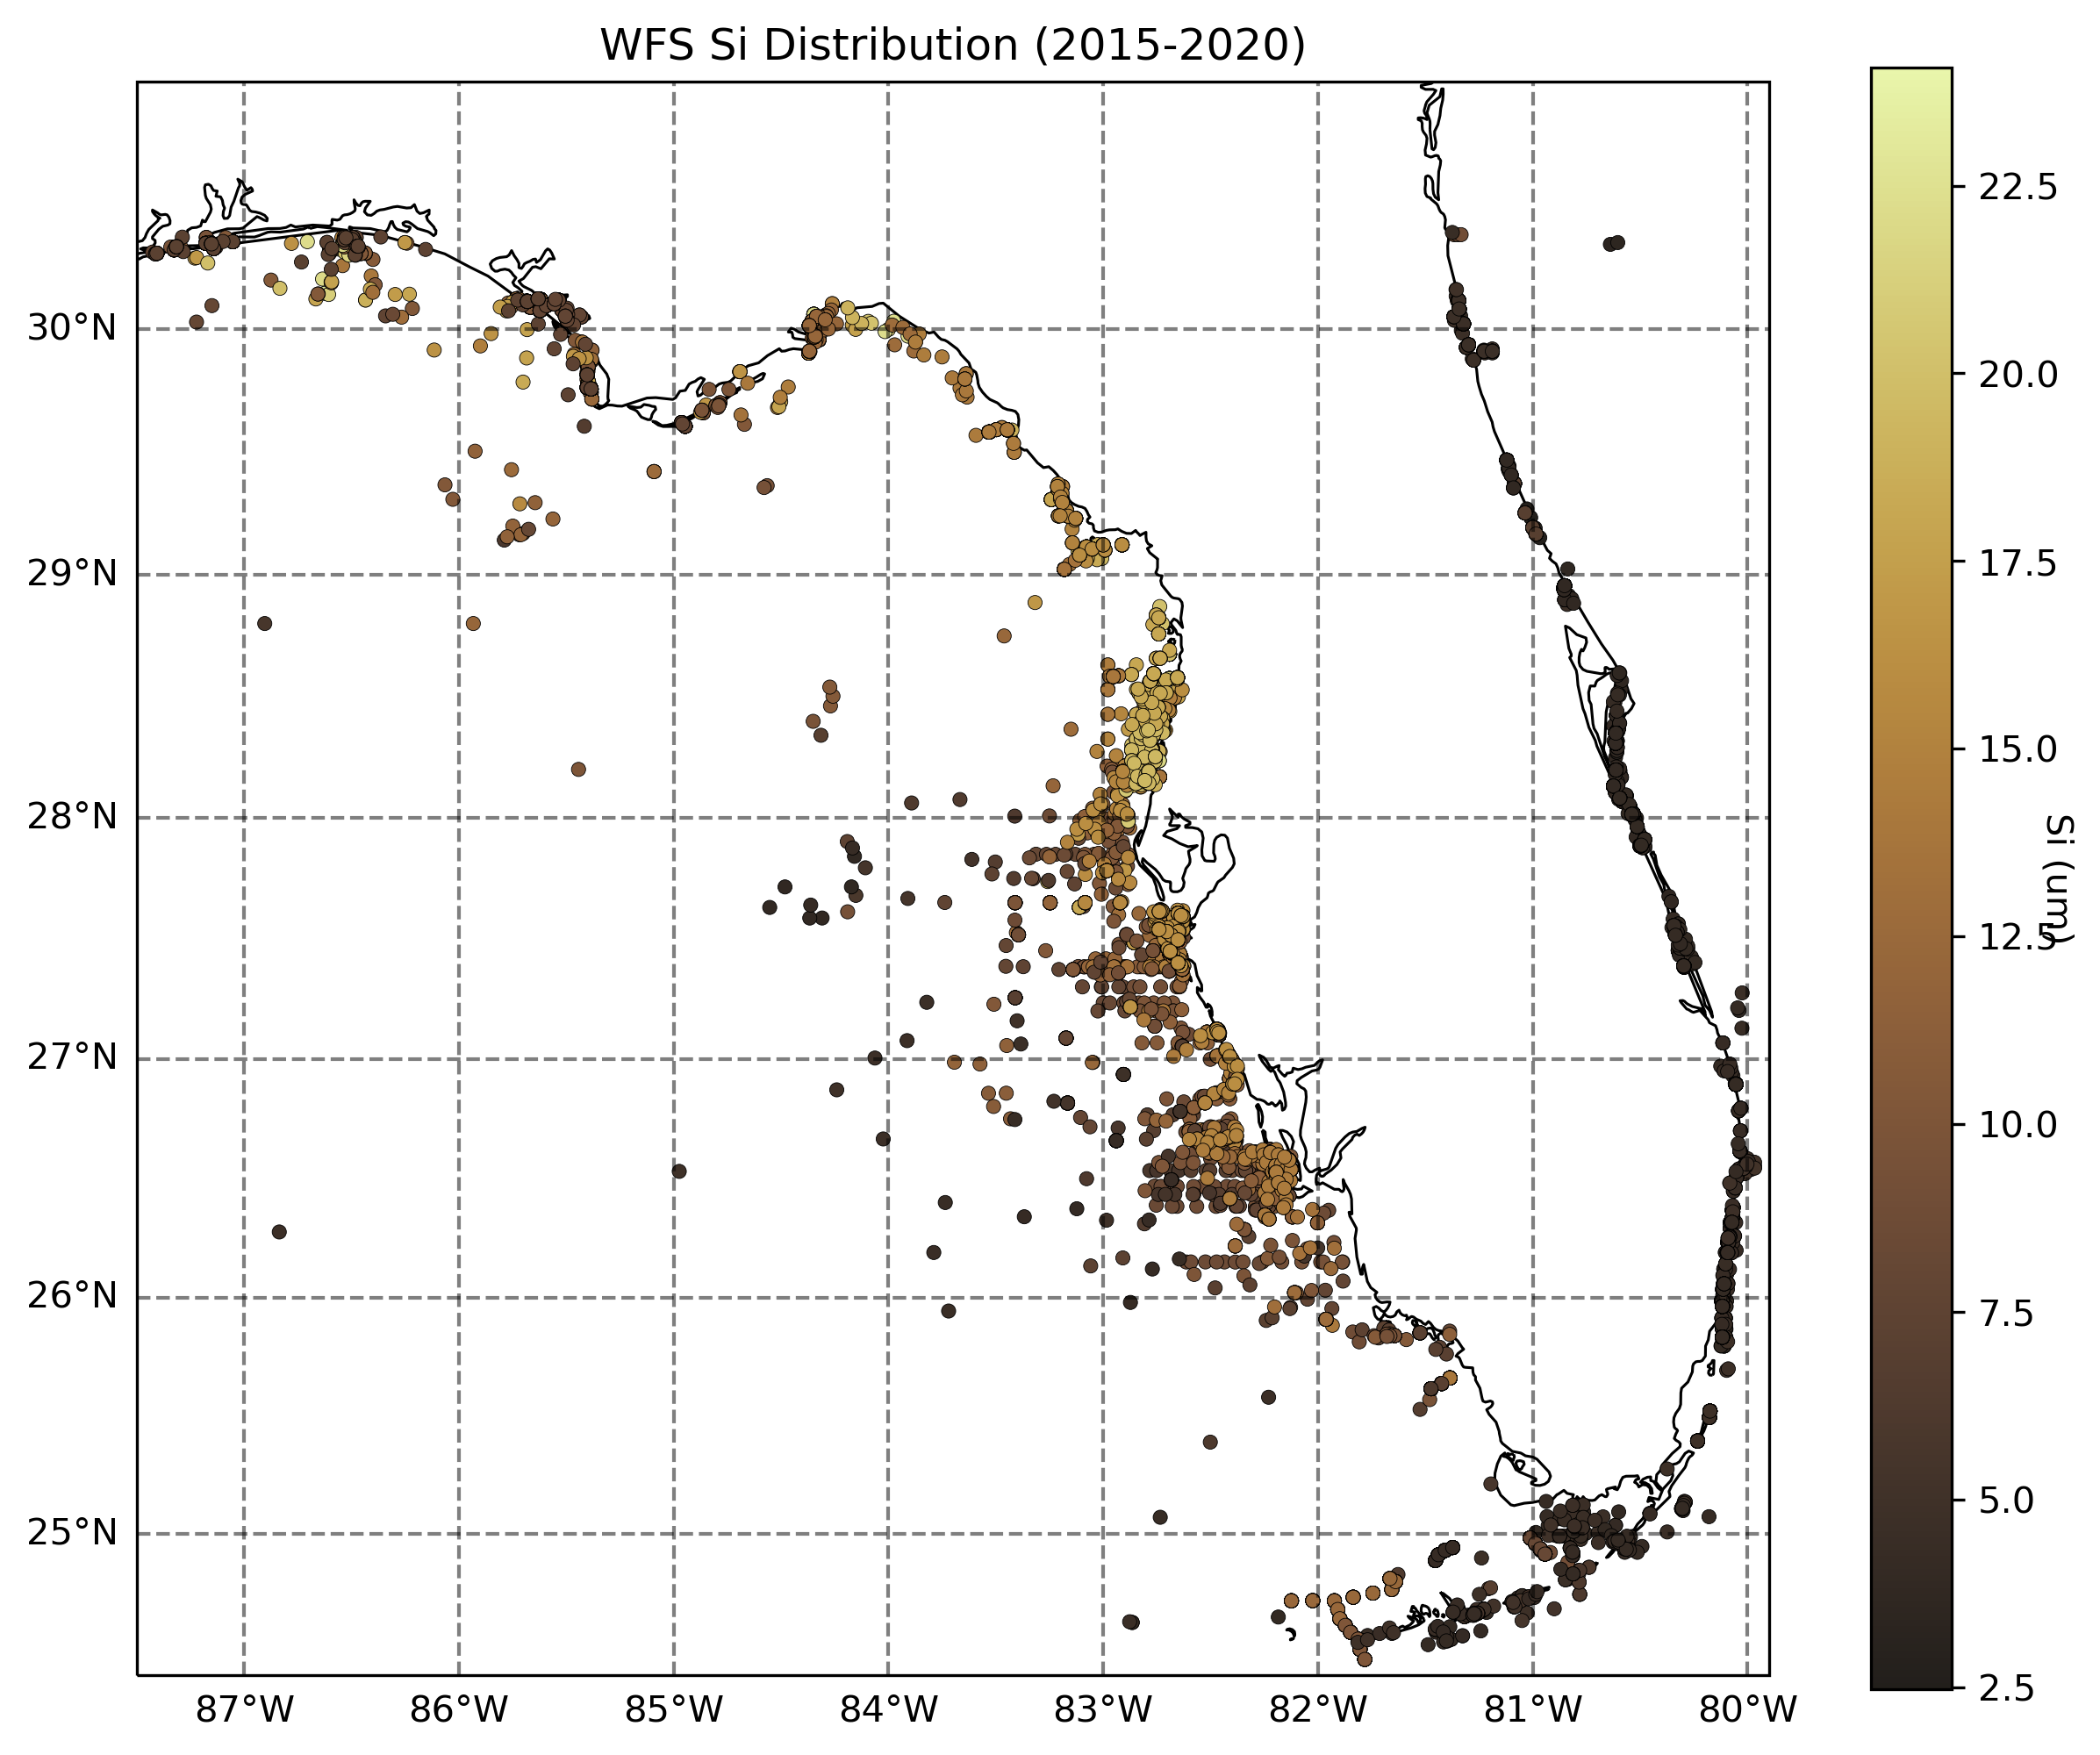

In [4]:
SiPlot=CF.FigurePlot('SiPlot','SiAx','WFS Si Distribution (2015-2020)','SiScatter',Lon,Lat,Si,cmo.cm.turbid_r,
                     'SiGl','Si (um)','SiPlot.png')

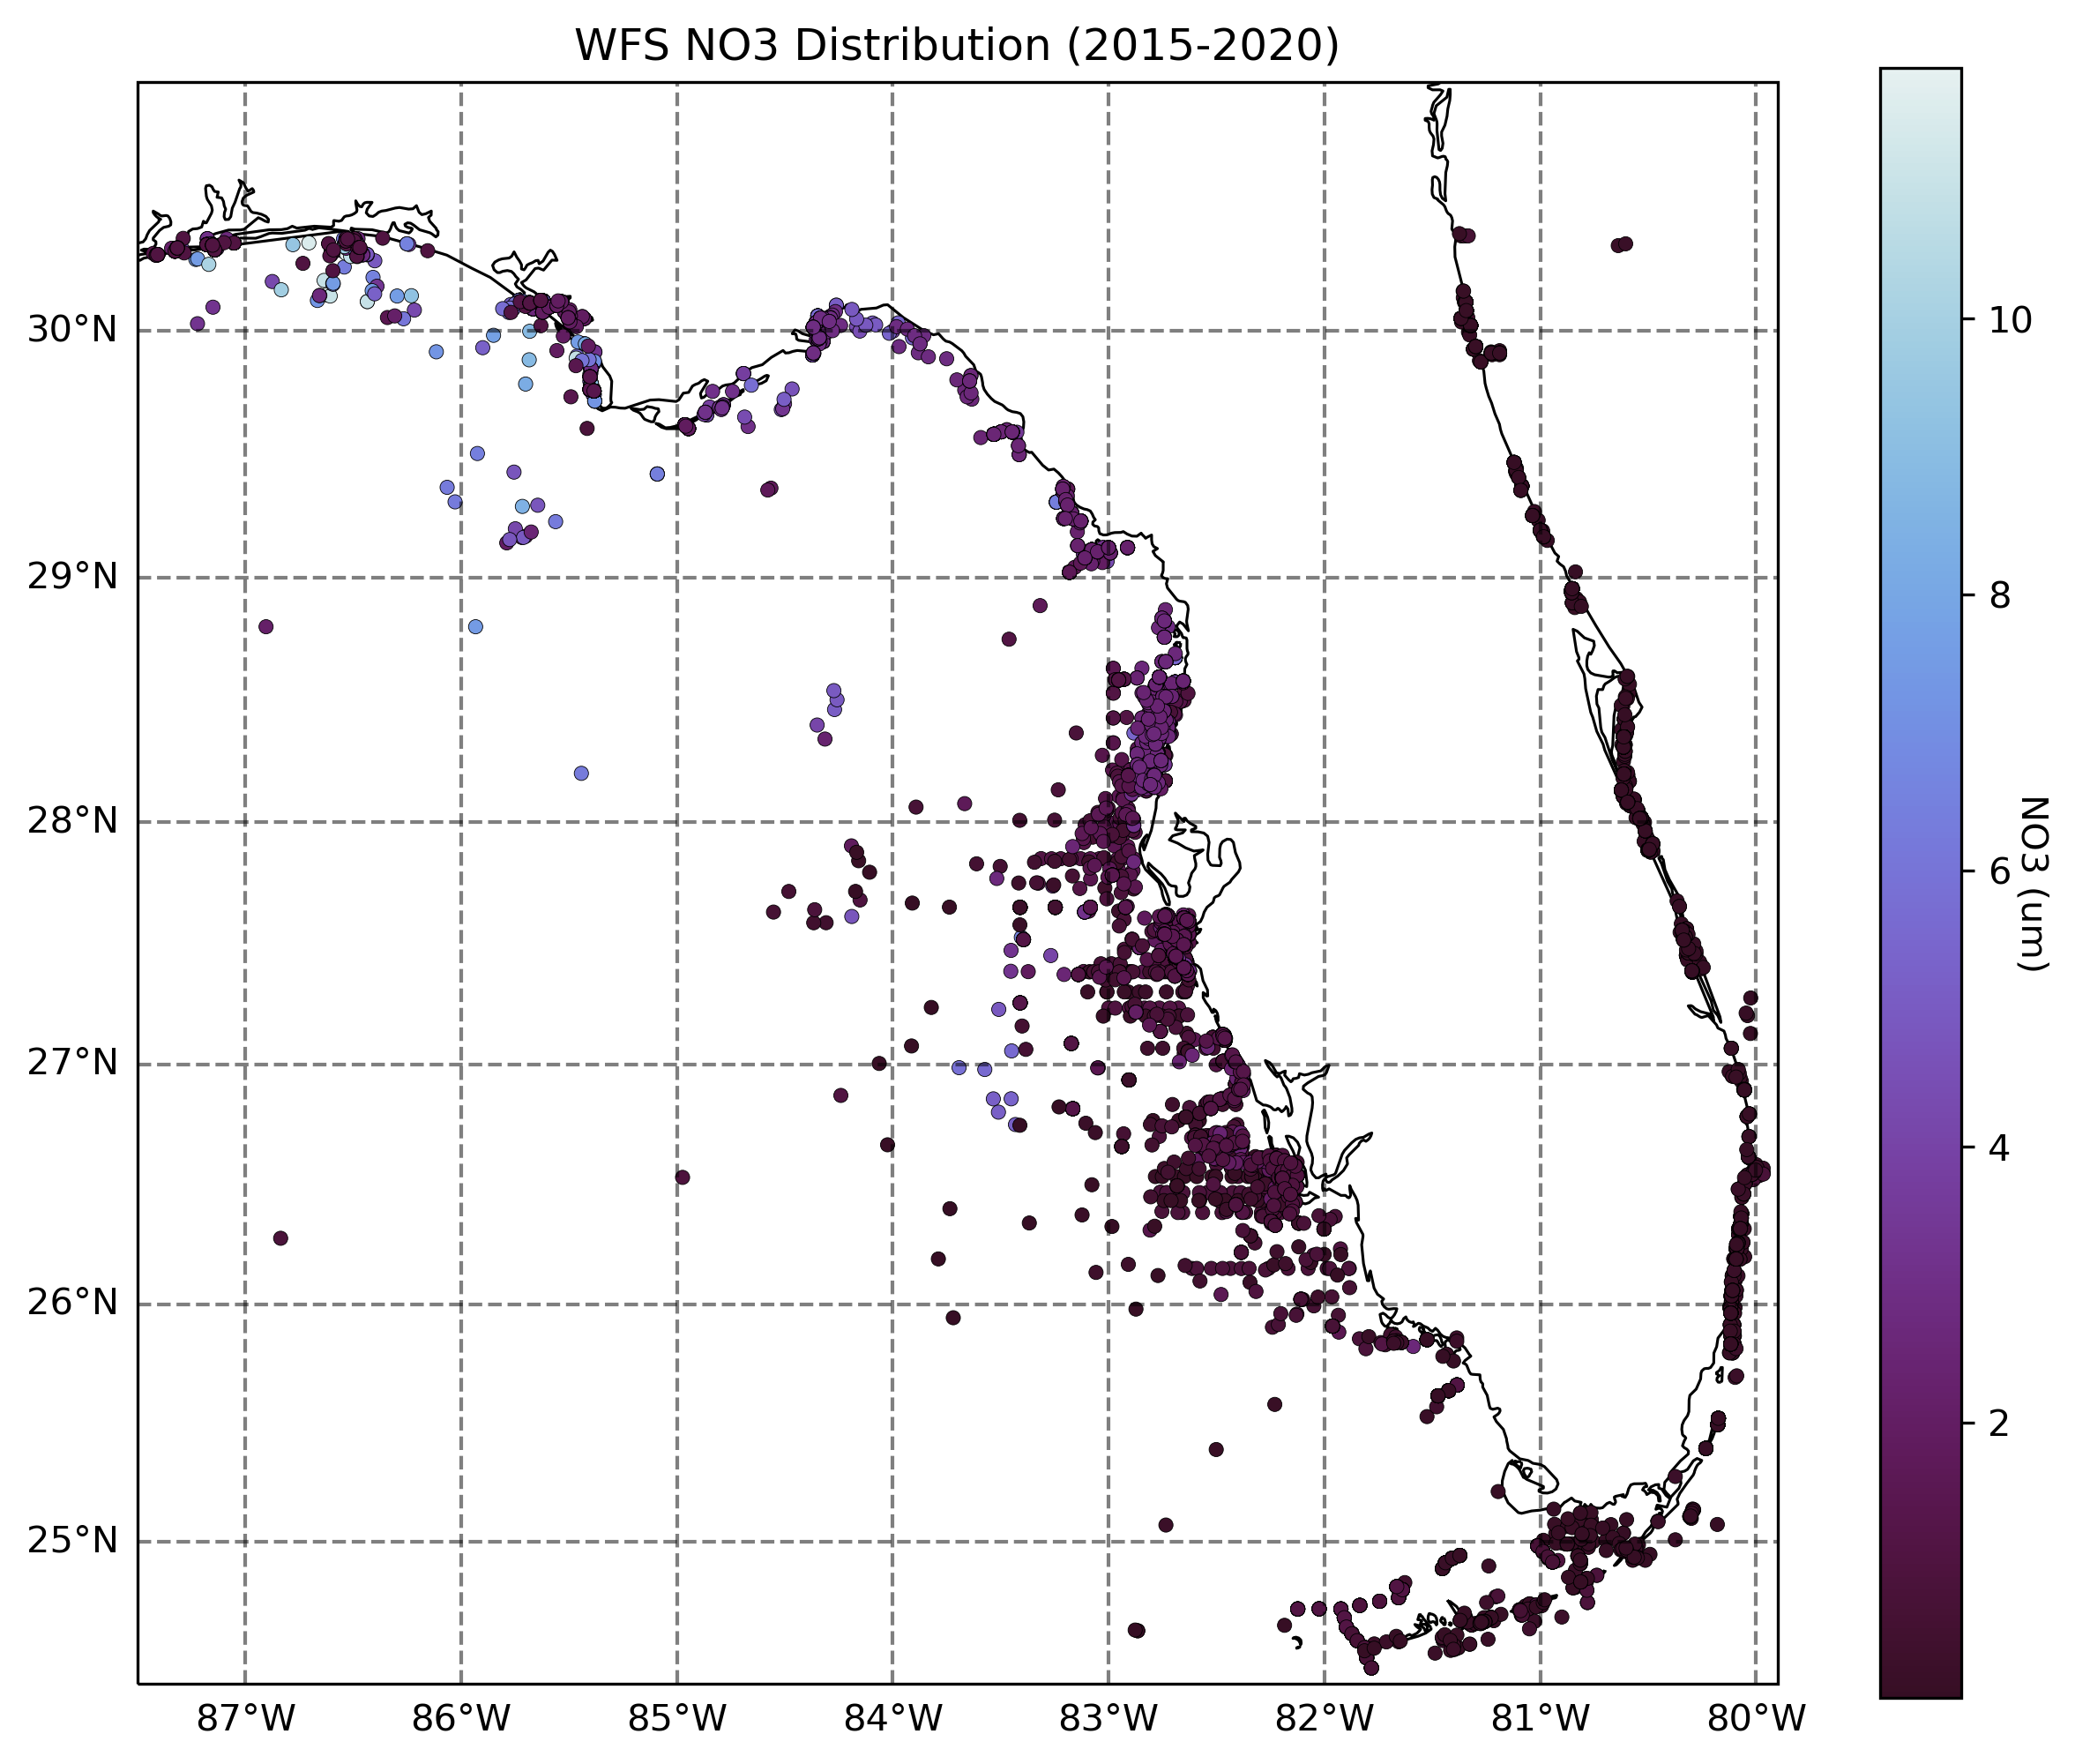

In [5]:
NO3Plot=CF.FigurePlot('NO3Plot','NO3Ax','WFS NO3 Distribution (2015-2020)','NO3Scatter',Lon,Lat,NO3,cmo.cm.dense_r,
                     'NO3Gl','NO3 (um)','NO3Plot.png')

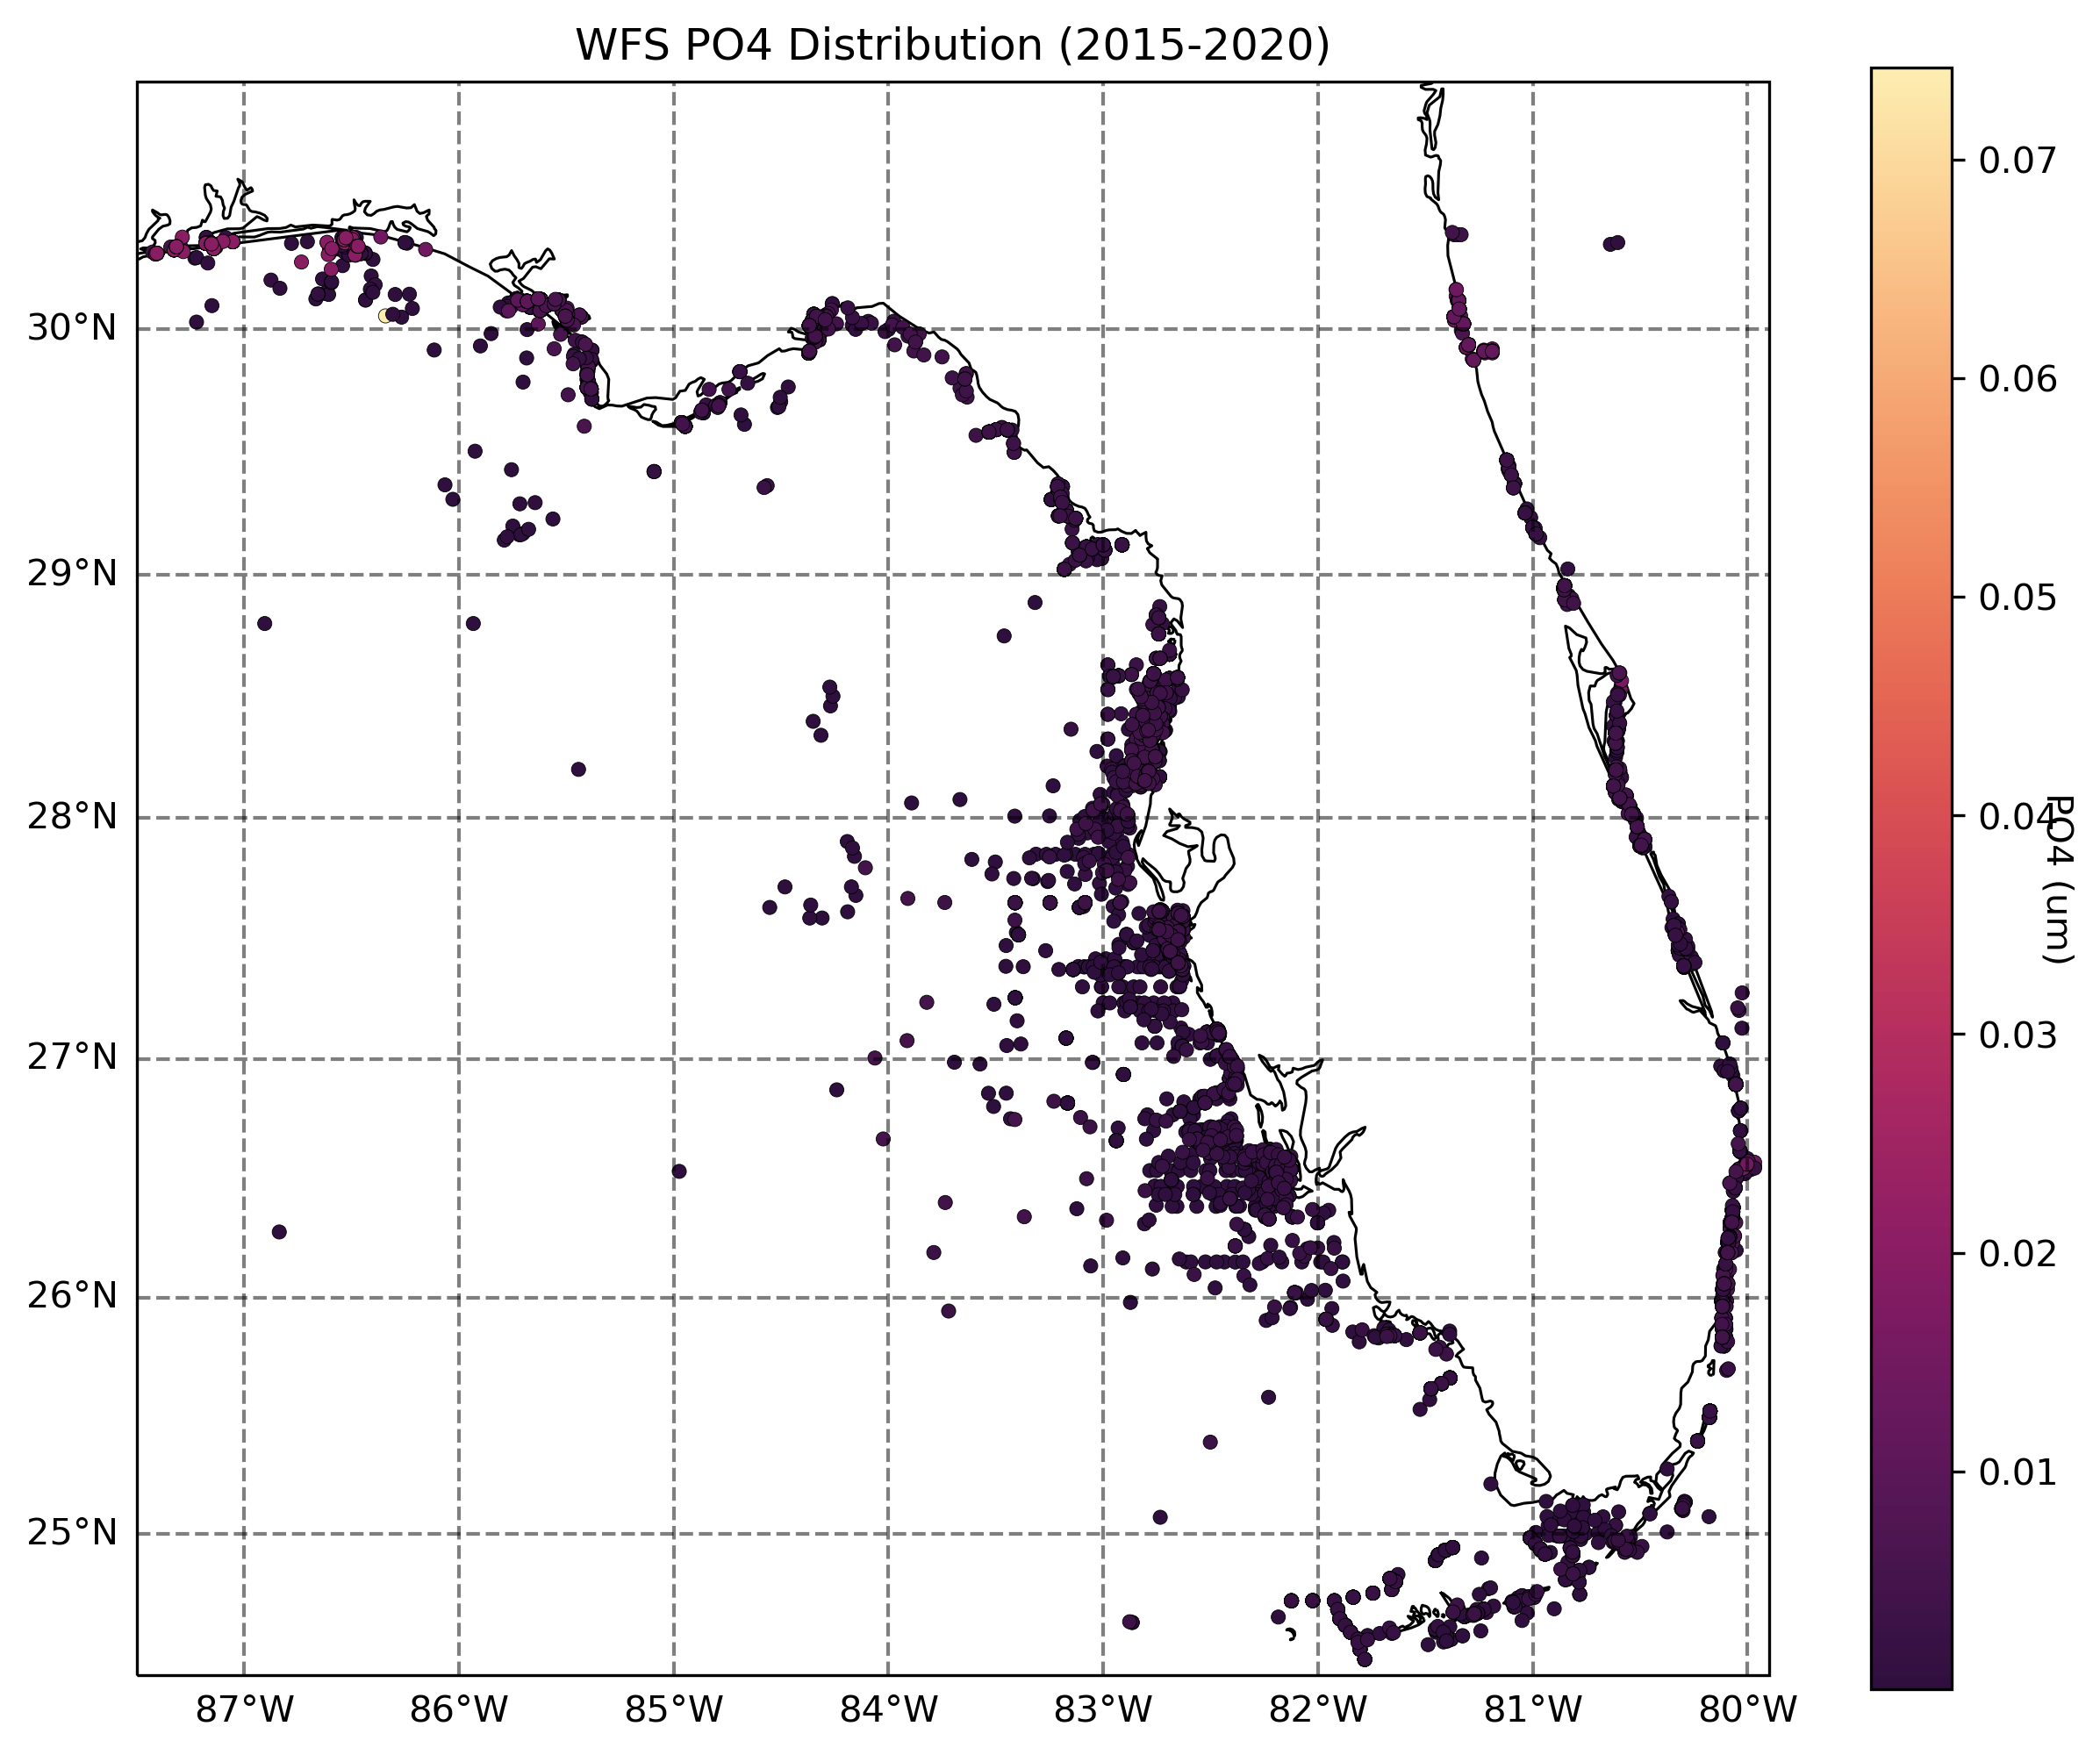

In [6]:
PO4Plot=CF.FigurePlot('PO4Plot','PO4Ax','WFS PO4 Distribution (2015-2020)','PO4Scatter',Lon,Lat,PO4,cmo.cm.matter_r,
                     'PO4Gl','PO4 (um)','PO4Plot.png')

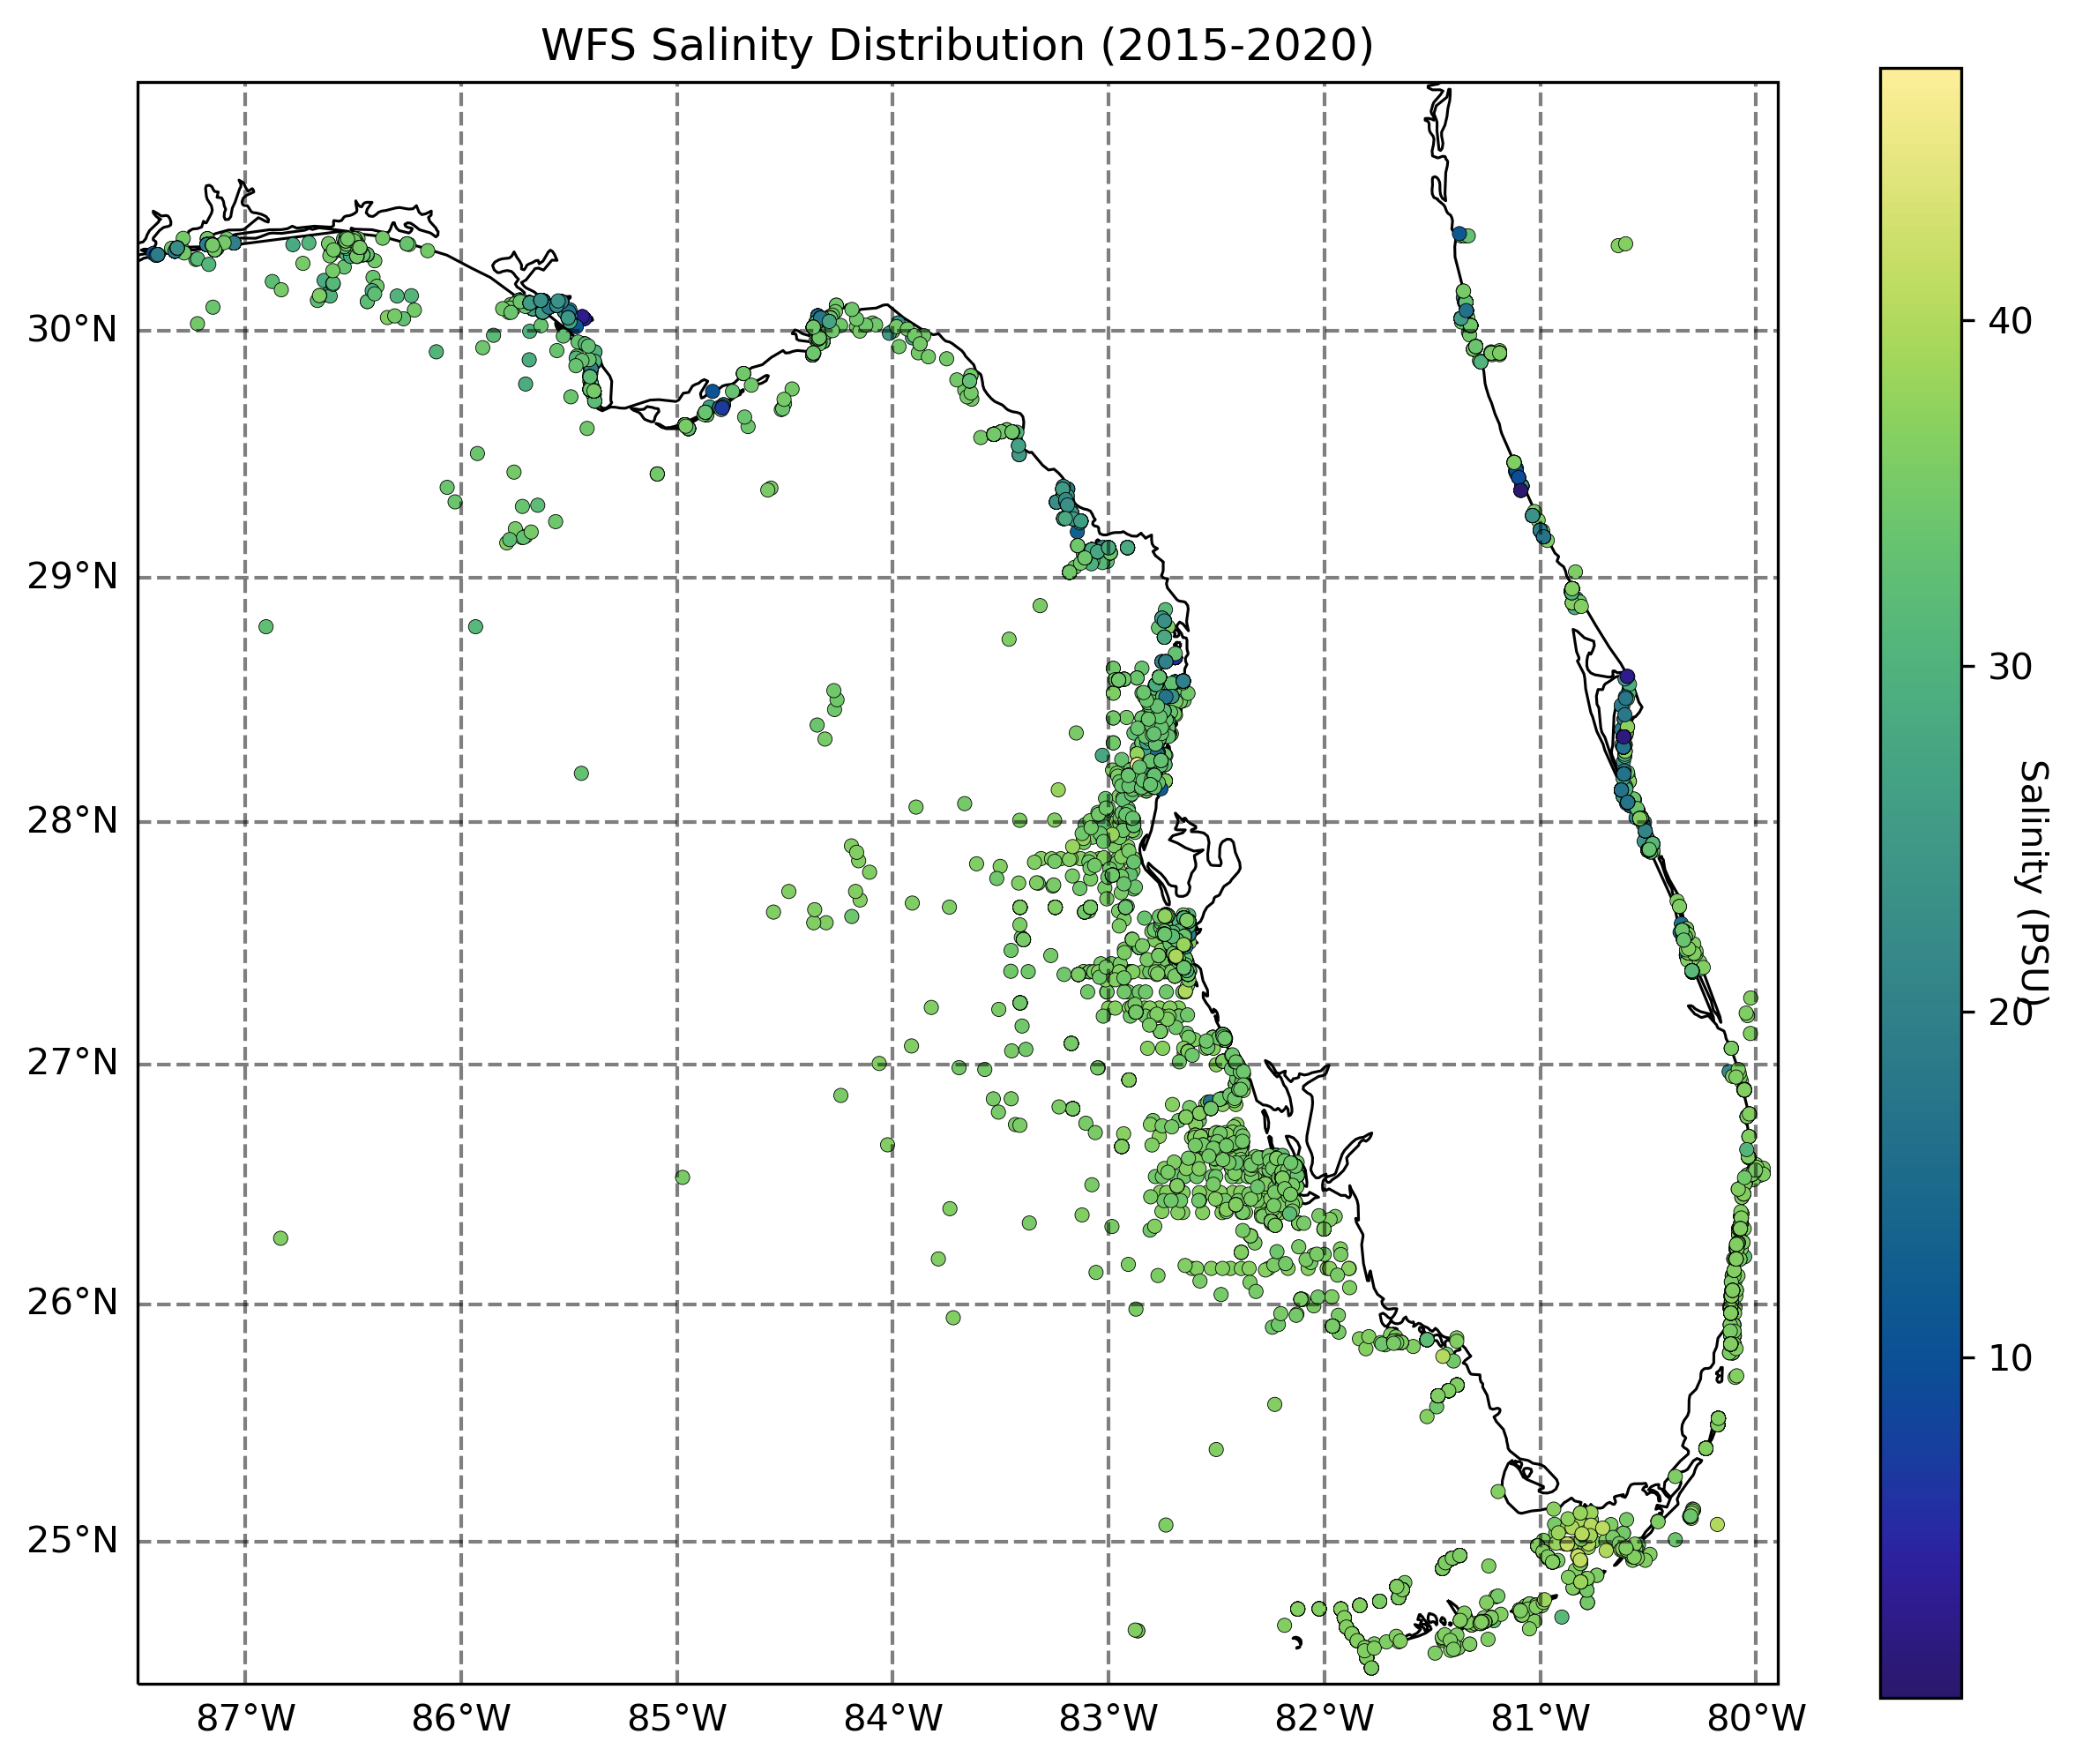

In [7]:
SalPlot=CF.FigurePlot('SalPlot','SalAx','WFS Salinity Distribution (2015-2020)','SalScatter',Lon,Lat,Sal,cmo.cm.haline,
                     'SalGl','Salinity (PSU)','SalPlot.png')

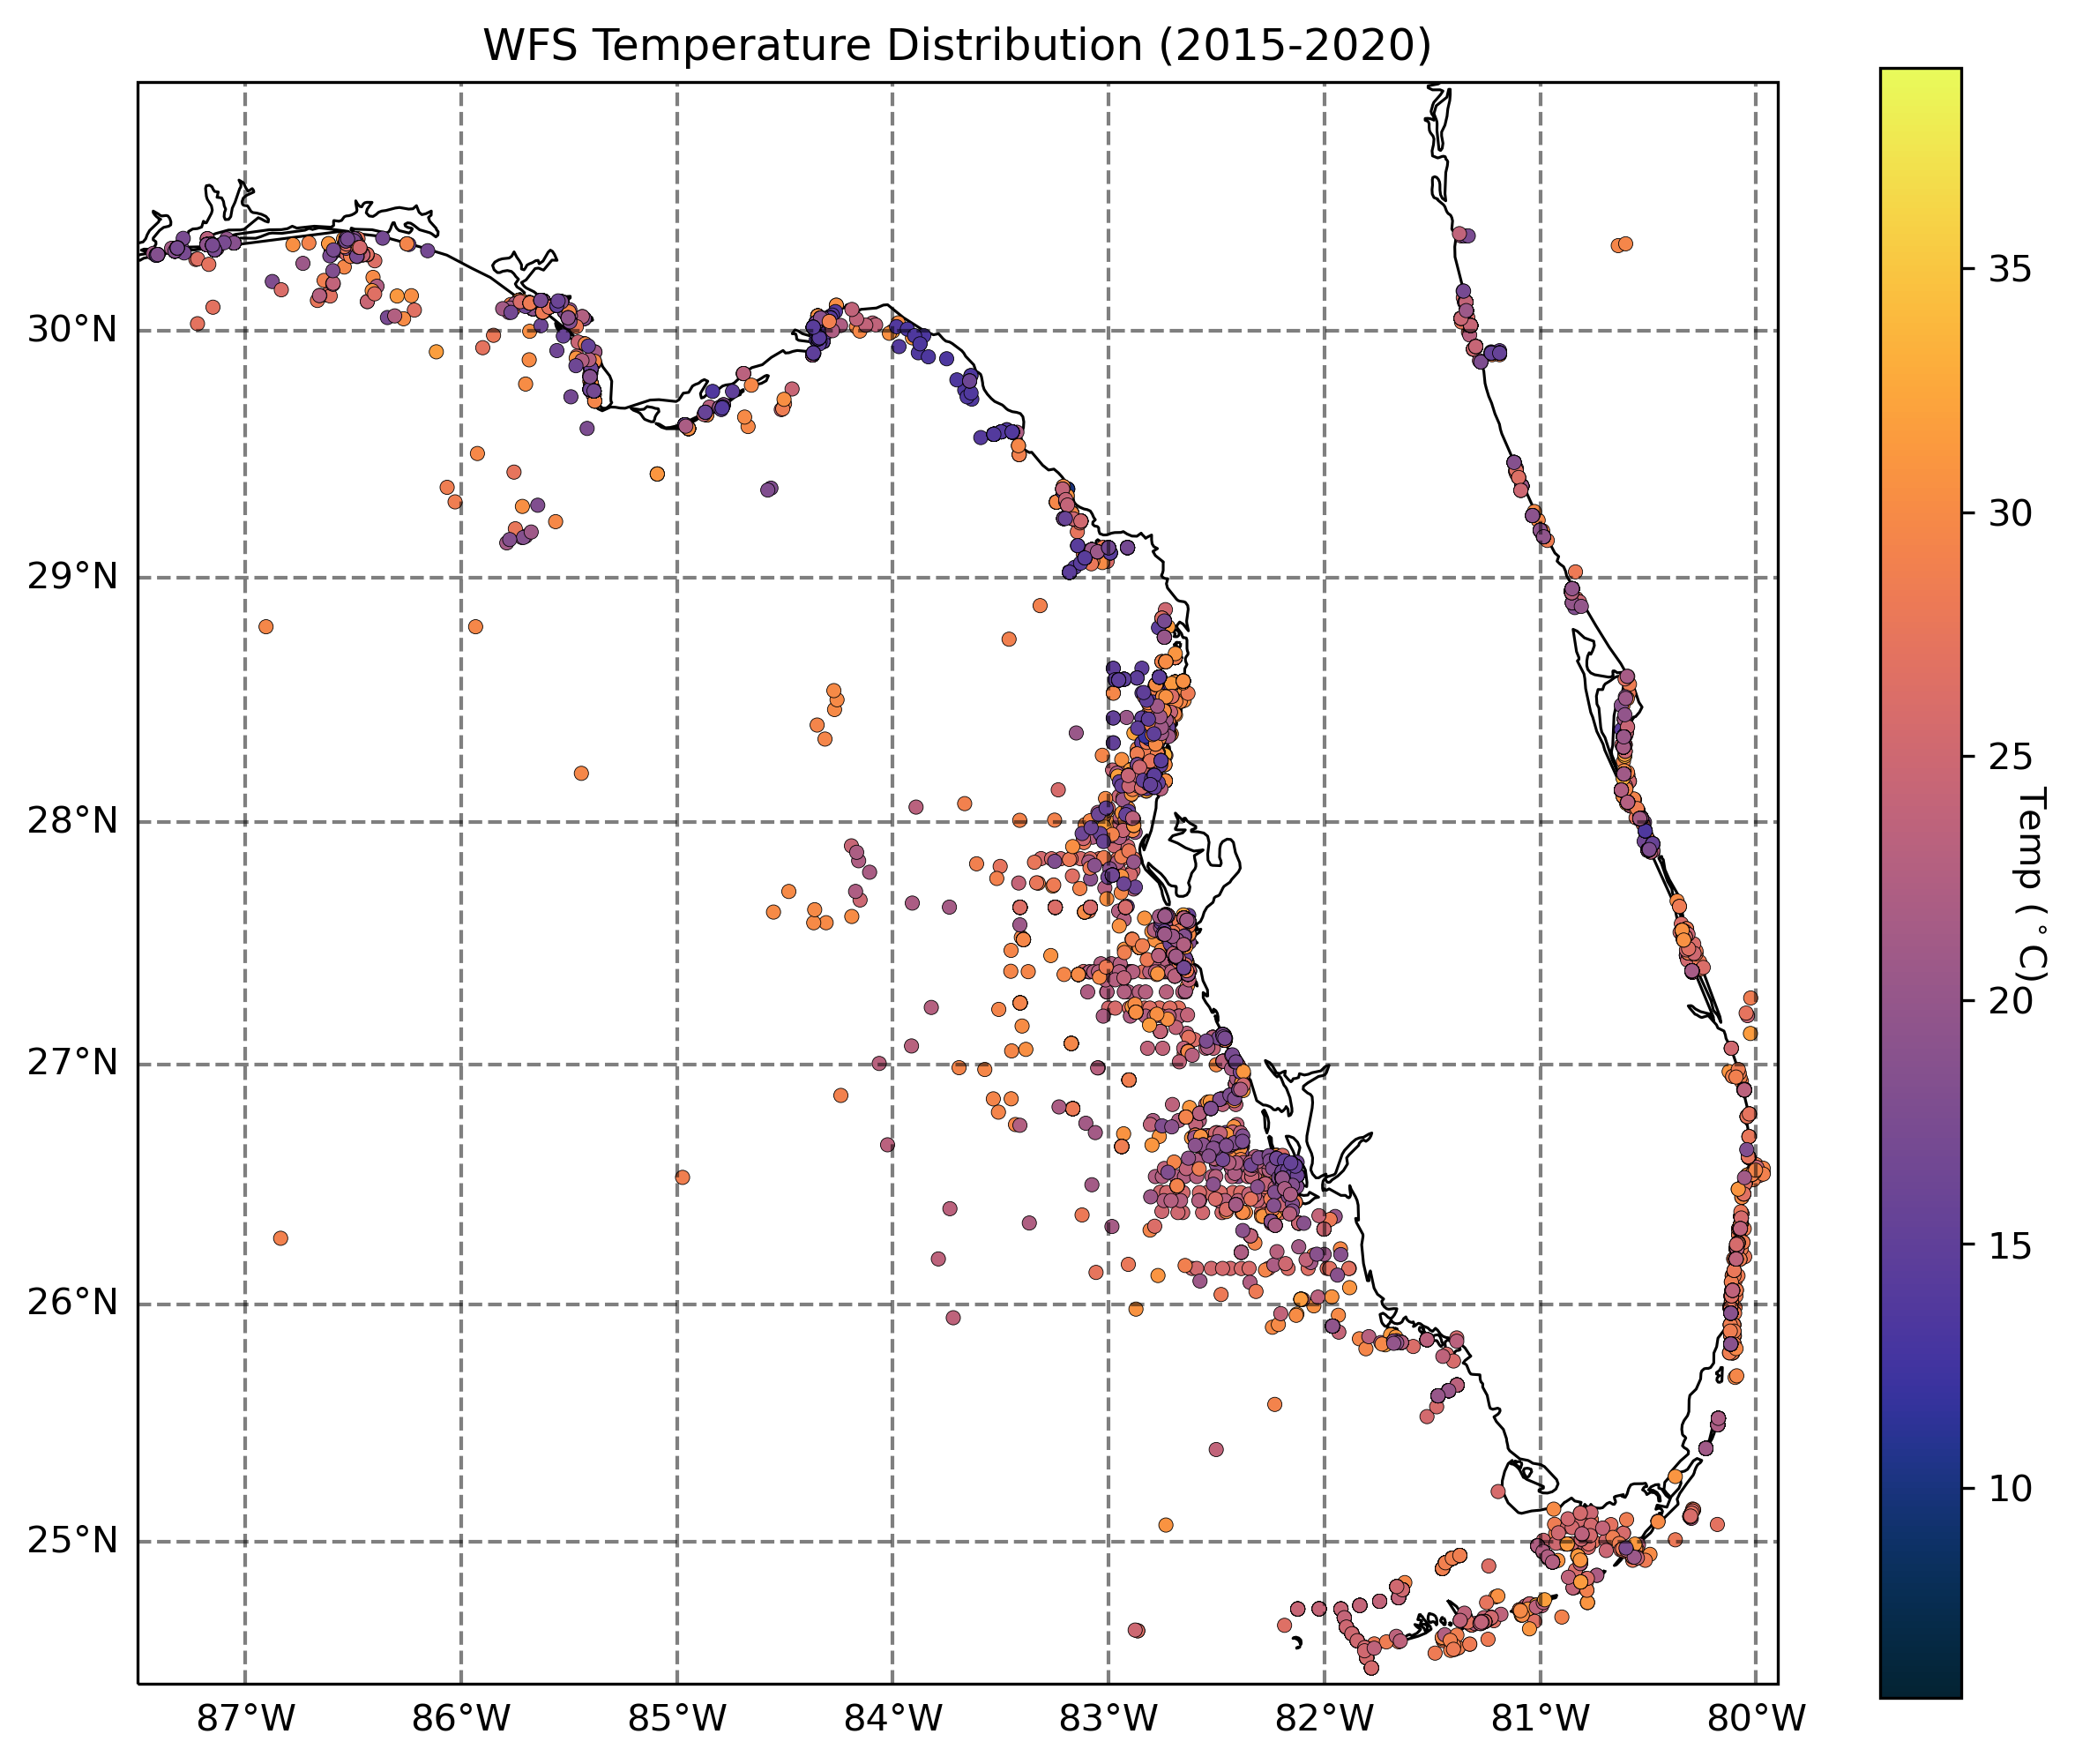

In [8]:
TempPlot=CF.FigurePlot('TempPlot','TempAx','WFS Temperature Distribution (2015-2020)','TempScatter',Lon,Lat,Temp,cmo.cm.thermal,
                     'TempGl','Temp ($^\circ$C)','TempPlot.png')

### T-S Diagram

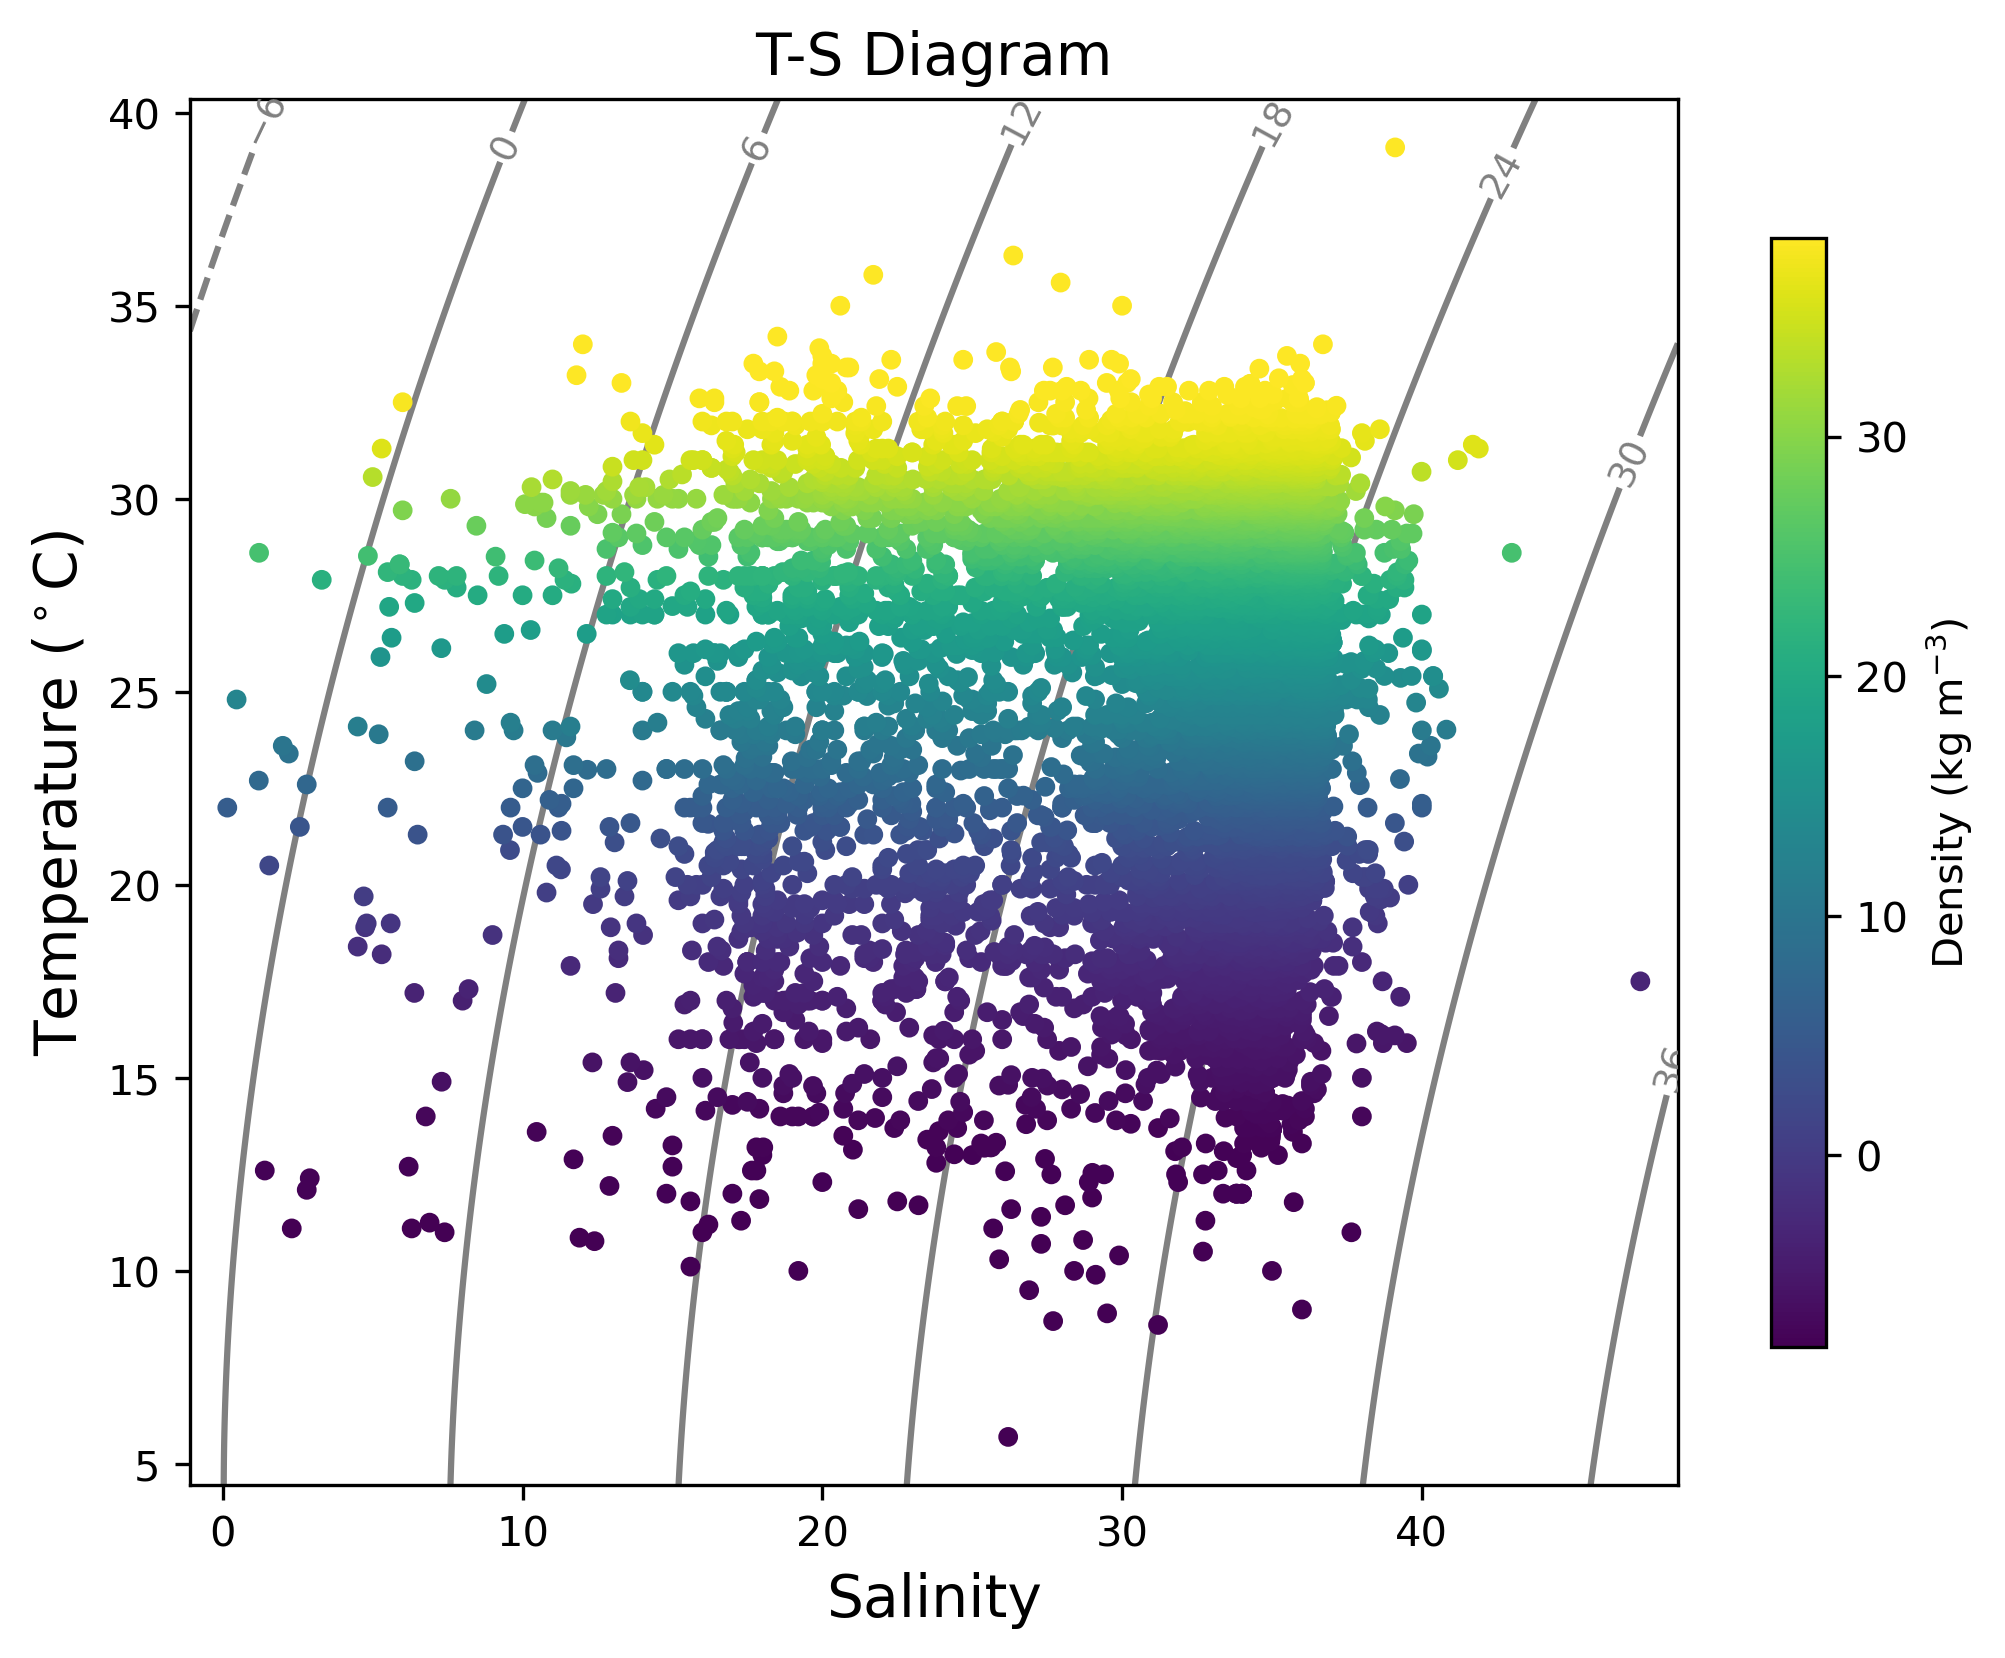

In [9]:
TS=CF.TS(Kb_final,'Temp_C', 'Salinity','TSDiagram.png')

### Spearman's Correlation (Nonparametric Test)

In [10]:
rho1,p1 = spearmanr(Kbrevis, Sal,alternative='two-sided')
rho2,p2 = spearmanr(Kbrevis, Temp,alternative='two-sided')
rho3,p3 = spearmanr(Kbrevis, NO3,alternative='two-sided')
rho4,p4 = spearmanr(Kbrevis, PO4,alternative='two-sided')
rho5,p5 = spearmanr(Kbrevis, Si,alternative='two-sided')

Value={'Test':['Kbrevis vs Sal','Kbrevis vs Temp','Kbrevis vs NO3','Kbrevis vs PO4','Kbrevis vs Si'], 
       'Rho':[rho1,rho2,rho3,rho4,rho5], 'P-value':[p1,p2,p3,p4,p5]}
SpearmanTestResult=pd.DataFrame(Value)
SpearmanTestResult

# Kbrevis cell counts vs parameters are all significant (p<0.05), potentially good for modeling!

Test       Rho       P-value
0   Kbrevis vs Sal  0.067445  1.262214e-11
1  Kbrevis vs Temp -0.061056  8.786673e-10
2   Kbrevis vs NO3  0.128968  1.381598e-38
3   Kbrevis vs PO4  0.021748  2.913160e-02
4    Kbrevis vs Si  0.167928  1.492788e-64